## HW7 Doris Chen

p.189 #9(c) 

For the validation set: Instance 12 is different from tree prediction, the tree predicted it to be "-", but it is "+"

    Trainig error = “Generalization Error”
    
    error = 1/5 = 20%

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import graphviz

df = pd.read_csv("Data/Titanic/Titanic-expanded.csv")
df.head(5)

,Class,Sex,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No


In [2]:
#a
pd.crosstab([df.Sex,df.Class],df.Survived, normalize='index').round(2)

Survived        No   Yes
Sex    Class            
Female 1st    0.03  0.97
       2nd    0.12  0.88
       3rd    0.54  0.46
       Crew   0.13  0.87
Male   1st    0.66  0.34
       2nd    0.86  0.14
       3rd    0.83  0.17
       Crew   0.78  0.22

In [3]:
pd.crosstab([df.Age,df.Class],df.Survived, normalize='index').round(2)

Survived       No   Yes
Age   Class            
Adult 1st    0.38  0.62
      2nd    0.64  0.36
      3rd    0.76  0.24
      Crew   0.76  0.24
Child 1st    0.00  1.00
      2nd    0.00  1.00
      3rd    0.66  0.34

chivalry: The first table shows that the probability of survive of female is more than male's, and the death probability of males is higher, which means the men gave up the chance to live to the women. 
    
barbarity: The second table shows that the probability of survive of 3rd class children is low.

In [4]:
#b
df.Survived.value_counts()

No     1490
Yes     711
Name: Survived, dtype: int64

In [5]:
attributes = df.drop(['Survived'], axis = 1)
attributes = pd.get_dummies(attributes)
target = df.Survived

In [6]:
# Initialize the tree
Tree = tree.DecisionTreeClassifier(max_depth = 2) #understading data other than prediction -> 2 levels

In [7]:
Tree.fit(attributes,target)

DecisionTreeClassifier(max_depth=2)

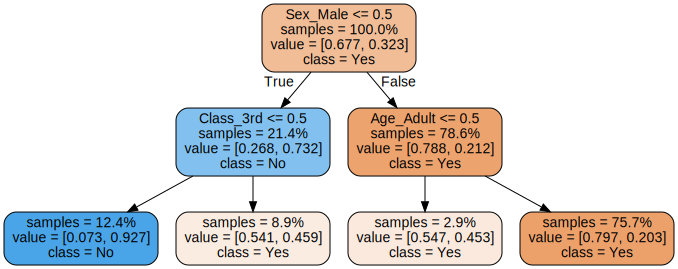

In [8]:
dot_data = tree.export_graphviz(Tree,
                               out_file=None,
                               feature_names=attributes.columns,
                               class_names = ['Yes','No'],
                               proportion=True,
                               impurity=False,
                               filled=True,
                               rounded=True)
graph = graphviz.Source(dot_data)
#graph.render('Titanic')
graph

### Problem (White Wine)

In [9]:
df = pd.read_csv("Data/Wine/Wine_white.csv", sep=';')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
#bin data
df['rating'] = pd.qcut(df.quality , q=2, labels = ['bad','good'])
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,bad
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,bad
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,bad


In [11]:
df.rating.value_counts()

bad     3838
good    1060
Name: rating, dtype: int64

In [12]:
#df['rating'] = pd.cut(df.quality,[0,5,10],labels = ['bad','good'])
#df.rating.value_counts()

In [13]:
attributes = df.drop(['quality','rating'], axis = 1)
target = df.rating

In [14]:
Tree = tree.DecisionTreeClassifier()
# 'min_samples_split': [5,10,15,20,25,30,35,40,45,50,55,60,65,70] -> output is 40 -> check number around 40
# then: 'min_samples_split': [35,36,37,38,39,40,41,42,43,44,45]
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
TreeCV = GridSearchCV(Tree, param_grid = parameters, n_jobs=-1,return_train_score=True)
TreeCV.fit(attributes,target)
print(TreeCV.best_params_)
print(TreeCV.best_score_)
print(TreeCV.best_estimator_)

{'max_depth': 5}
0.7995042838381522
DecisionTreeClassifier(max_depth=5)


In [15]:
#cross-validation results
results = pd.DataFrame()
results['max_depth'] = parameters['max_depth']
results['error'] = 1 - TreeCV.cv_results_['mean_test_score']
results

,max_depth,error
0,1,0.216415
1,2,0.217447
2,3,0.220709
3,4,0.211731
4,5,0.200496
5,6,0.217856
6,7,0.219487
7,8,0.221732
8,9,0.237048
9,10,0.231127


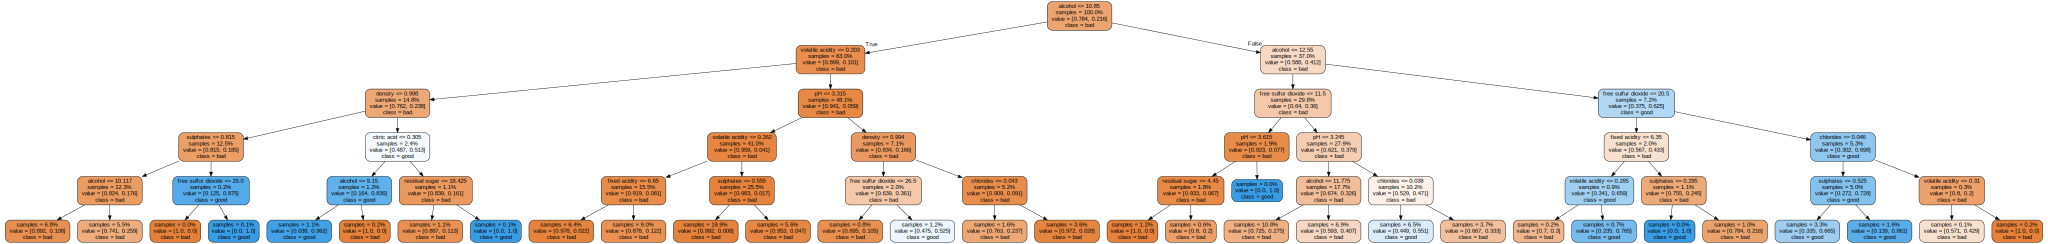

In [16]:
dot_data = tree.export_graphviz(TreeCV.best_estimator_,
                               out_file=None,
                               feature_names=attributes.columns,
                               class_names = df.rating.cat.categories,
                               proportion=True,
                               impurity=False,
                               filled=True,
                               rounded=True)
graph = graphviz.Source(dot_data)
graph.render('WhiteWine')
graph

The the tree depth that minimizes generalization error for a decision tree that differentiates good white wine from bad white wine is 5.

One of the characteristics of good white wine is high alcohol content because most of good white wines are on the right of the root, which means they have more than 10.85 of alcohol.